### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

https://keras.io/api/datasets/#fashion-mnist-database-of-fashion-article

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_num = [i for i in range(len(class_names))]

Class_df = pd.DataFrame(class_names,columns=['Class_Name'],index=class_num)
Class_df

,Class_Name
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [5]:
X_train.ndim

3

### Data Reshape

### Find the why we change dimenstion of this array 4d

In [7]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### Data normalization
We normalize the data dimensions so that they are of approximately the same scale.

In [9]:
X_train_n = X_train/255
X_test_n = X_test /255

### Split the data into train/validation/test datasets

- In the earlier step of importing the data, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dataset is used in deep learning:

- **Training data** — used for training the model
- **Validation data** — used for tuning the hyperparameters and evaluating the models
- **Test data** — used to test the model after the model has gone through initial vetting by the validation set

In [10]:
X_valid , X_train = X_train_n[:5000] , X_train_n[5000:]
y_valid , y_train = y_train[:5000] , y_train[5000:]
X_test = X_test_n # real data

### Creat the model architecture

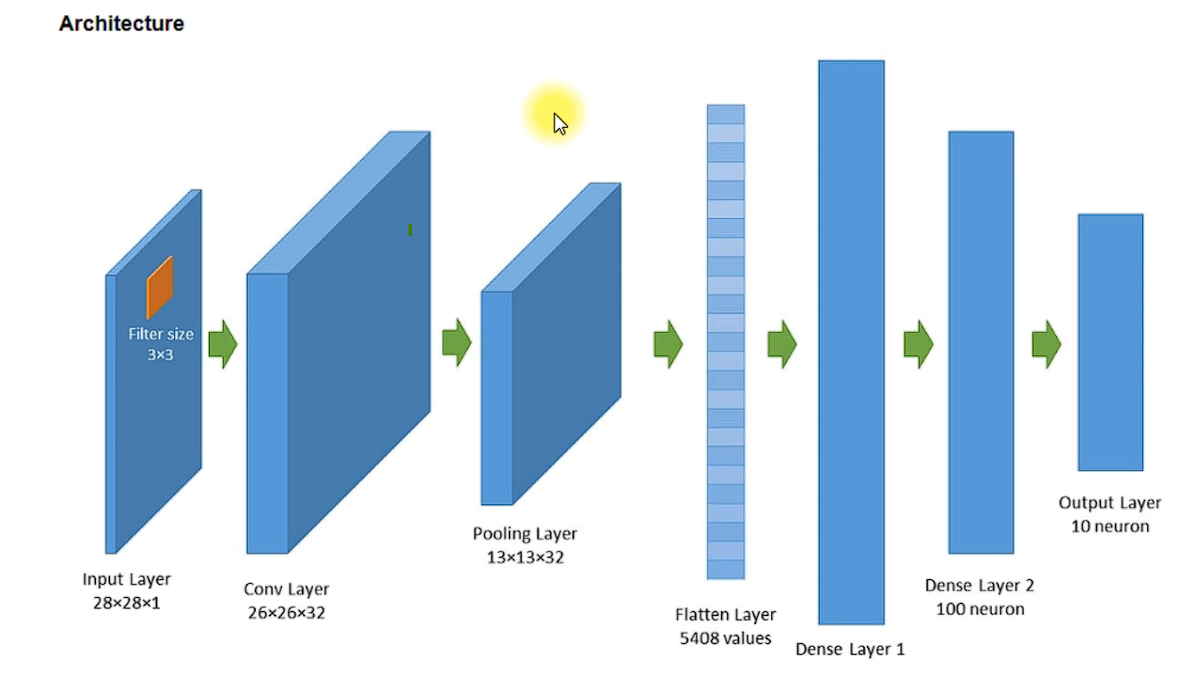

In [11]:
from keras.models import Sequential

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       1,622,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',metrics=['accuracy'])

In [44]:
Model_history = model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/10


860/860 [==============================] - 21s 24ms/step - loss: 0.8592 - accuracy: 0.7059 - val_loss: 0.5816 - val_accuracy: 0.7900
Epoch 2/10
860/860 [==============================] - 24s 28ms/step - loss: 0.5231 - accuracy: 0.8098 - val_loss: 0.4955 - val_accuracy: 0.8276
Epoch 3/10
860/860 [==============================] - 24s 28ms/step - loss: 0.4670 - accuracy: 0.8328 - val_loss: 0.4992 - val_accuracy: 0.8122
Epoch 4/10
860/860 [==============================] - 26s 30ms/step - loss: 0.4330 - accuracy: 0.8447 - val_loss: 0.4023 - val_accuracy: 0.8612
Epoch 5/10
860/860 [==============================] - 16s 19ms/step - loss: 0.4050 - accuracy: 0.8549 - val_loss: 0.3841 - val_accuracy: 0.8662
Epoch 6/10
860/860 [==============================] - 23s 27ms/step - loss: 0.3853 - accuracy: 0.8630 - val_loss: 0.3738 - val_accuracy: 0.8668
Epoch 7/10
860/860 [==============================] - 17s 19ms/step - loss: 0.3674 - accuracy: 0.8661 - val_loss: 0.4060 - val_accurac

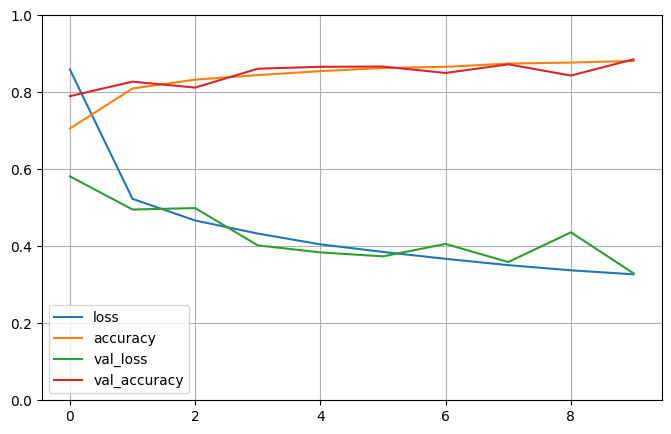

In [46]:
import pandas as pd


pd.DataFrame(Model_history.history).plot(figsize=(8,5))

plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [48]:
ev = model.evaluate(X_test_n,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3475 - accuracy: 0.8757


In [50]:
ev

[0.34748753905296326, 0.8756999969482422]

In [62]:
X_new = X_test[:3]

In [64]:
Class_df

,Class_Name
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


In [66]:
# Use model.predict to get the probability distribution
y_pred = model.predict(X_new)

# Convert the probabilities to class labels by getting the index of the maximum probability
y_pred_classes = y_pred.argmax(axis=-1)

# Output the predicted classes
y_pred_classes

1/1 [==============================] - 0s 47ms/step


array([9, 2, 1], dtype=int64)

AxesImage(size=(28, 28))


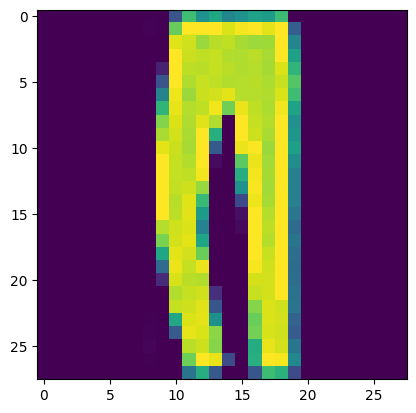

In [70]:
print(plt.imshow(X_test[2].reshape((28,28))))